In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, train_test_split

In [9]:
pc_df = pd.read_csv("data/computer_hardware_dataset.csv")
pc_df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
pc_df.dtypes

vendor_name    object
model_name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [4]:
pc_df.isna().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [5]:
pc_df.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [16]:
# Looking for outliers
pc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


## Data EDA

In [6]:
# Drop columns function
def drop_columns(df, col_name):
    df = df.drop(columns=[col_name], inplace=True)
    return df

In [7]:
pc_df = drop_columns(pc_df, "model_name")

In [11]:
pc_df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


## Feature Engineering

### Training and Testing Sets
Target is PRP

In [20]:
y = pc_df["PRP"]  # Target
X = pc_df.drop(columns="PRP")  # Predict model Features

In [21]:
# Spliting data into subsets. Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(167, 9)

(42, 9)

(167,)

(42,)

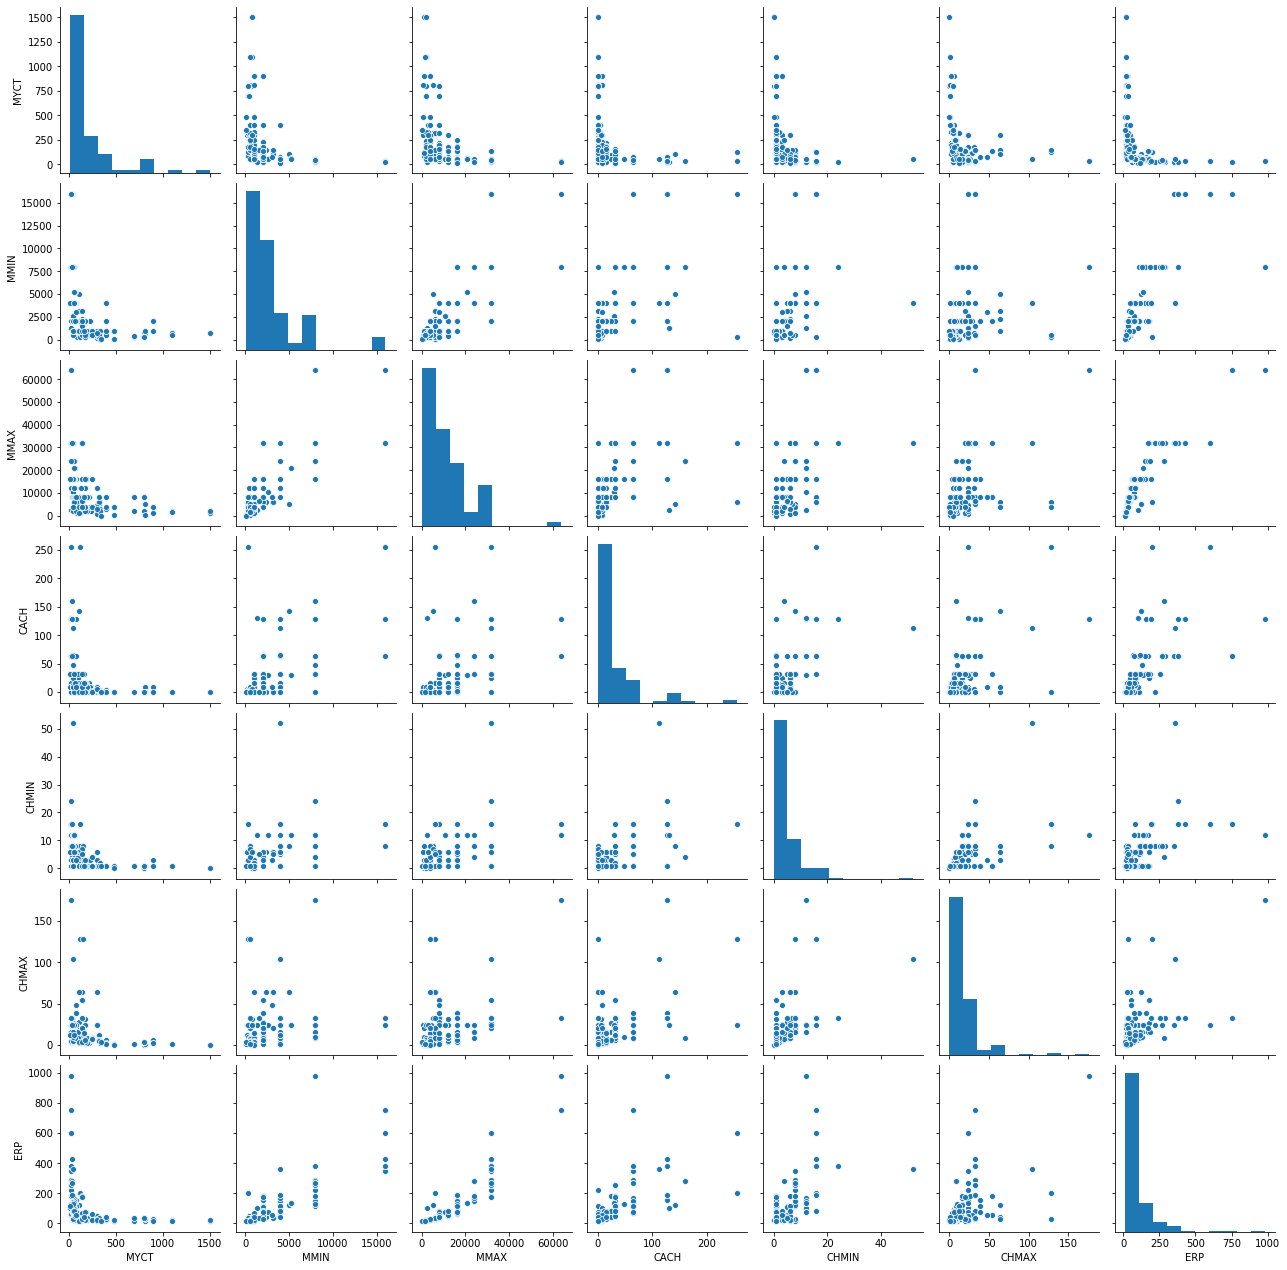

In [27]:
# Checking the distribution of the variables
sns.pairplot(X_train)

### Observation:
Data is right skewed, making it to appear as an exponential graph

We want our data to form more of a low bias and low variance distribution

In [29]:
# Can transform data using log because it is the inverse of exponential
X_train_log = np.log(X_train, np.e, np.e**2)

ValueError: invalid number of arguments